### California Housing Price Prediction .

###### Problem Objective :

###### The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

In [ ]:
1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.
----------------------------------------------------------------------------------------------------------------------

2. Handle missing values :
Fill the missing values with the mean of the respective column.
----------------------------------------------------------------------------------------------------------------------

3. Encode categorical data :
Convert categorical column in the dataset to numerical data.
----------------------------------------------------------------------------------------------------------------------

4. Split the dataset : 
Split the data into 80% training dataset and 20% test dataset.
----------------------------------------------------------------------------------------------------------------------

5. Standardize data :
Standardize training and test datasets.
-----------------------------------------------------------------------------------------------------------------------

6. Perform Linear Regression : 
Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]
-----------------------------------------------------------------------------------------------------------------------    

7. Bonus exercise: Perform Linear Regression with one independent variable :
Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
-------------------------------------------------------------------------------------------------------------------------

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [162]:
warnings.filterwarnings('ignore')

In [163]:
import os

In [164]:
pwd()   ## Getting the path.

'C:\\Users\\Ankit Khicha'

### Task -1 : Loading the data by converting the xlsx file to csv file.

In [165]:
cal_house = pd.read_csv("california_housing.csv")

In [166]:
cal_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


#### By the dataset we have our target variable(Y) or dependent variabe is median_house_value. 

### Performing the EDA Activities

In [167]:
cal_house.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500


In [168]:
cal_house.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [169]:
cal_house.shape

(20640, 10)

In [170]:
type(cal_house)

pandas.core.frame.DataFrame

In [171]:
cal_house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [172]:
cal_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [173]:
cal_house.index

RangeIndex(start=0, stop=20640, step=1)

In [174]:
cal_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [175]:
cal_house.describe(include = 'object')  ## Getting the summarise value of object datatypes

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [176]:
cal_house.describe(exclude = ['int64','float64'])  ## Getting the summarise value of object datatypes

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [177]:
cal_house.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [178]:
## Getting the frequency of ocean_proximity.
cal_house.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Task 1(A) - Extracting the X and y from the above dataset in array format.

In [179]:
X = cal_house.iloc[:,:-1].values   # X is input of the dataset.
print(X)
y = cal_house.iloc[:,[-1]].values
y                                  # y is the output of the dataset.

[[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']]


array([[452600],
       [358500],
       [352100],
       ...,
       [ 92300],
       [ 84700],
       [ 89400]], dtype=int64)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

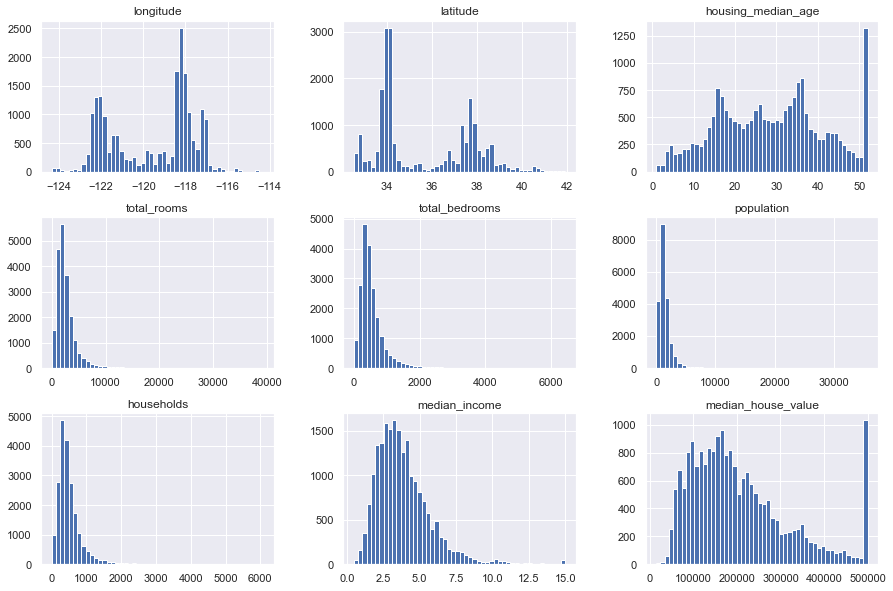

In [180]:
# Plotting the histogram plot for dataset.
#plt.figure(figsize = (10,10))
cal_house.hist(bins = 50 , figsize = (15,10))

In [221]:
### Checking the skewed values in the above dataset.
skew_val = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
from scipy.stats import skew
skewness = []
for i in skew_val:
    skewness.append(cal_house[i].skew())
    pd.DataFrame(skewness)
    print(pd.DataFrame(skewness))

          0
0 -0.297801
          0
0 -0.297801
1  0.465953
          0
0 -0.297801
1  0.465953
2  0.060331
          0
0 -0.297801
1  0.465953
2  0.060331
3  4.147343
          0
0 -0.297801
1  0.465953
2  0.060331
3  4.147343
4  3.459546
          0
0 -0.297801
1  0.465953
2  0.060331
3  4.147343
4  3.459546
5  4.935858
          0
0 -0.297801
1  0.465953
2  0.060331
3  4.147343
4  3.459546
5  4.935858
6  3.410438
          0
0 -0.297801
1  0.465953
2  0.060331
3  4.147343
4  3.459546
5  4.935858
6  3.410438
7  1.646657
          0
0 -0.297801
1  0.465953
2  0.060331
3  4.147343
4  3.459546
5  4.935858
6  3.410438
7  1.646657
8  0.977763


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

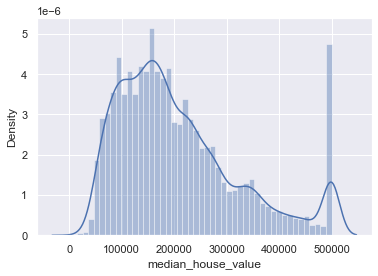

In [222]:
#Plotting the distribution plot for the same.
sns.distplot(cal_house.median_house_value)

<AxesSubplot:xlabel='median_income', ylabel='Density'>

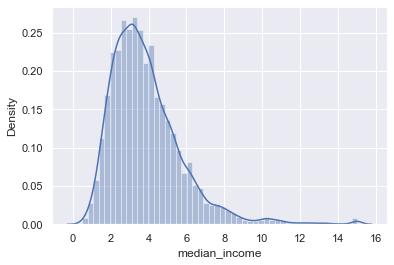

In [223]:
sns.distplot(cal_house.median_income)

#### Here we can see  by the histogram plot the maximum are skewed and clearly see that it is right skewed and median house age and median house values are capped peaks at the end.

#### It is also visulise by histogram plot of median house value that maximu value of house lies in between 100k to 300k.

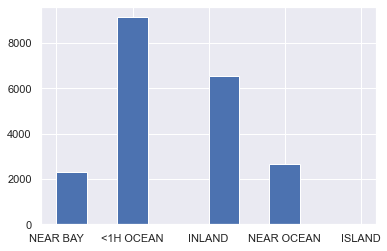

In [224]:
# Histogram for ocean_proximity.
cal_house.ocean_proximity.hist(bins = 10)
plt.show()

Text(0.5, 1.0, 'Distribution of House Hold')

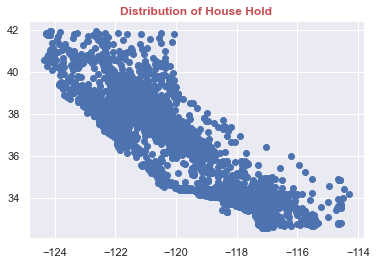

In [225]:
# PLotting the distributioin of household with latitude and longitude.
plt.scatter(x = cal_house['longitude'] , y = cal_house['latitude'])
plt.title('Distribution of House Hold' , weight = 'bold', color = 'r')

Text(0.5, 1.0, 'Distribution of House Hold')

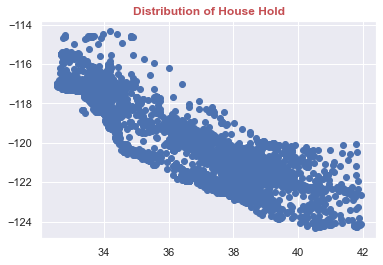

In [226]:
plt.scatter(x = cal_house['latitude'] , y = cal_house['longitude'])
plt.title('Distribution of House Hold' , weight = 'bold', color = 'r')

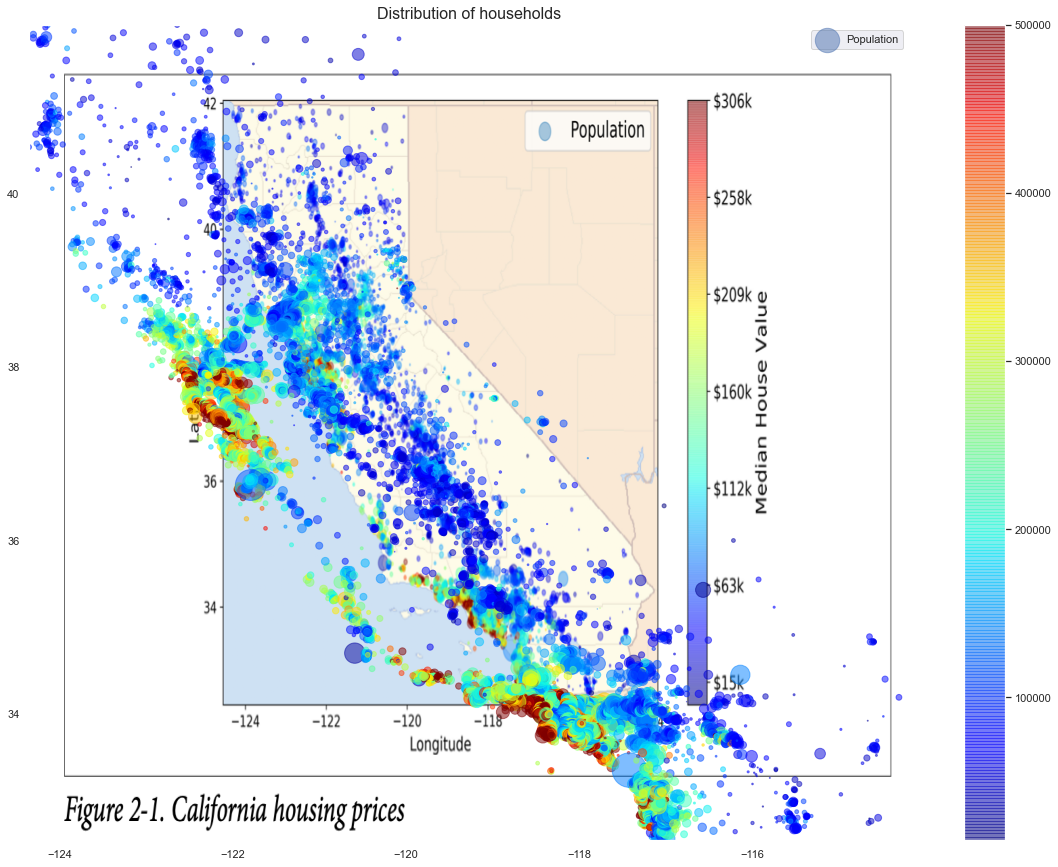

In [320]:
## Plotting the geopatial distrubution of household.
sns.set(rc = {'figure.figsize' : (20,15)})
img = plt.imread('californiaa.png')
plt.imshow(img , zorder = 1 ,extent = [-124.35,-114.2,32.54,41.95])
plt.scatter(x=cal_house['longitude'],y=cal_house['latitude'],alpha=0.5,s=cal_house['population']/30,c=cal_house['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=2,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()
plt.show()

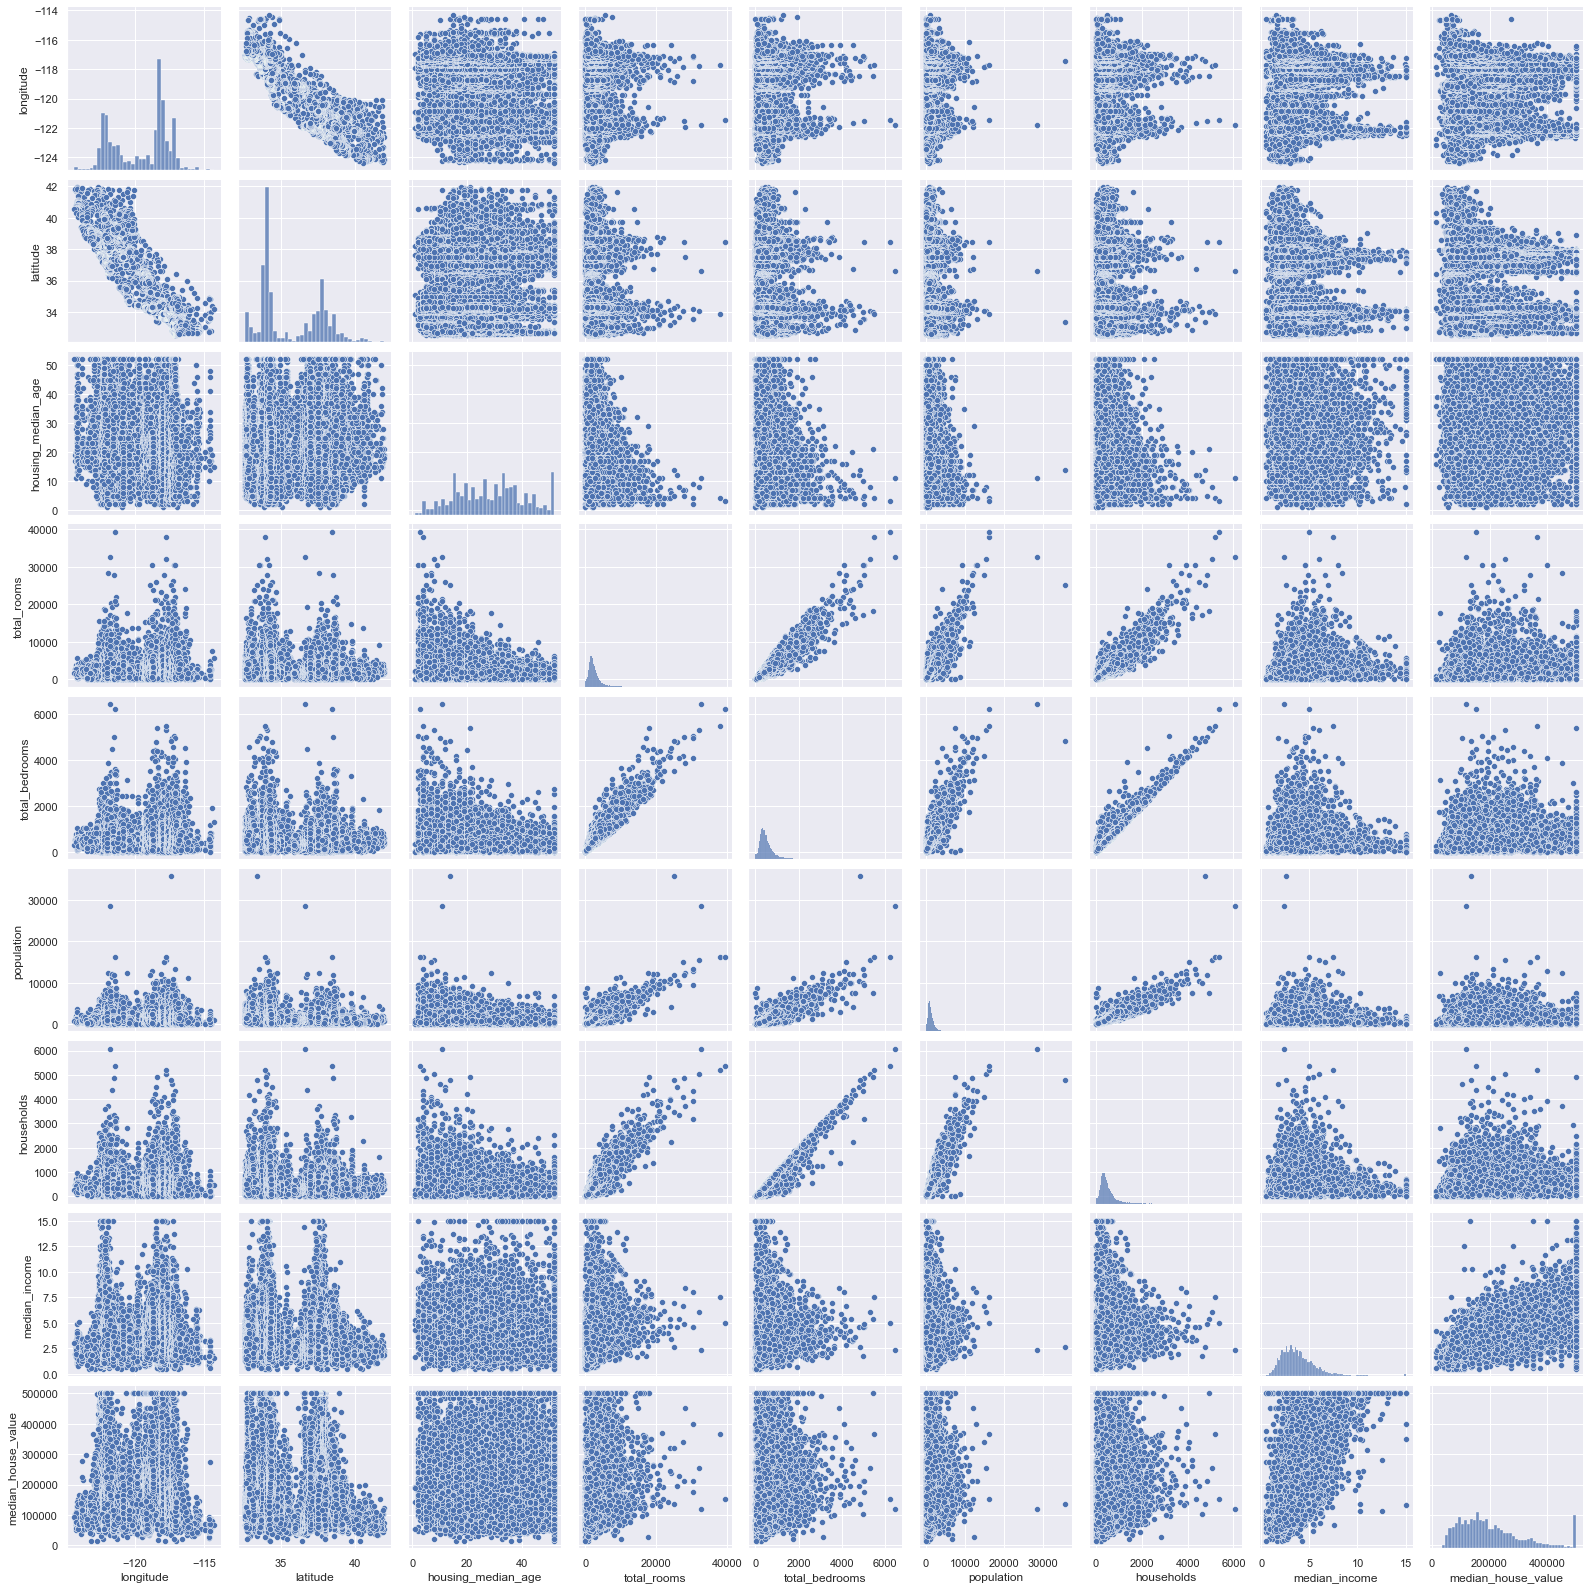

In [228]:
## Checking the relation among variables.
sns.pairplot(cal_house)

##### By the pair plot we can see the median_income has more promising with median house value.
##### total_rooms have linear relation with households

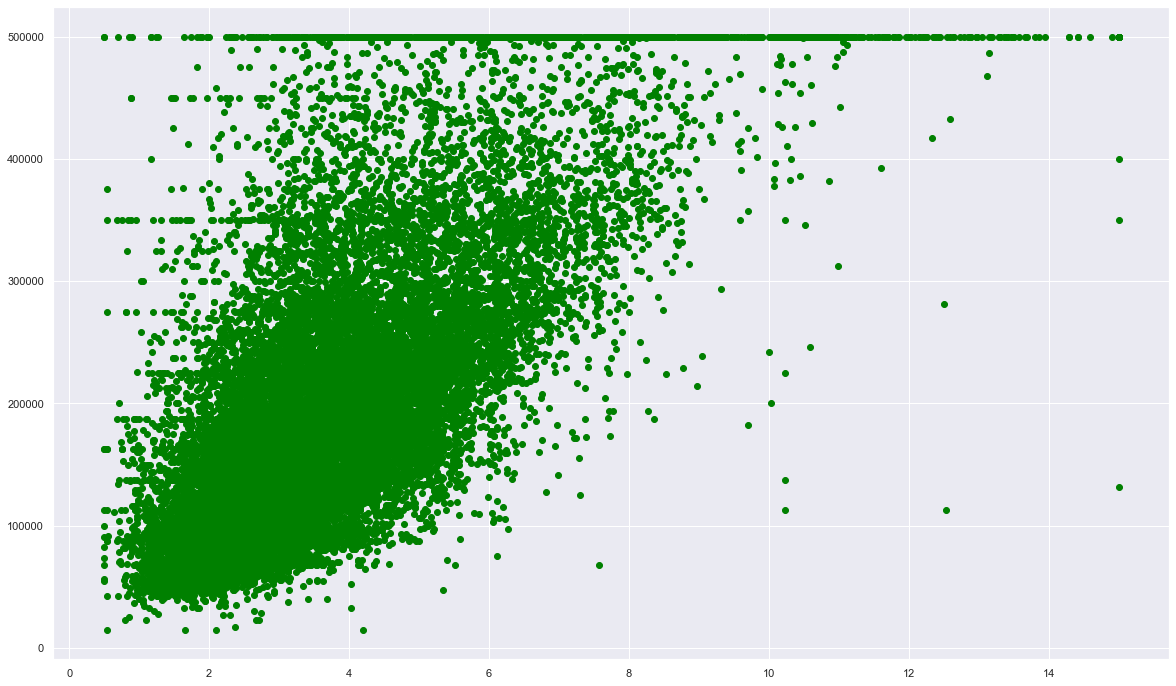

In [229]:
plt.scatter(x = cal_house['median_income'] , y = cal_house['median_house_value'] , color = 'green')

#### It has the most promising value we can see by scatter plot where in last can see a peak.These peaks can also be seen between 300k to 400

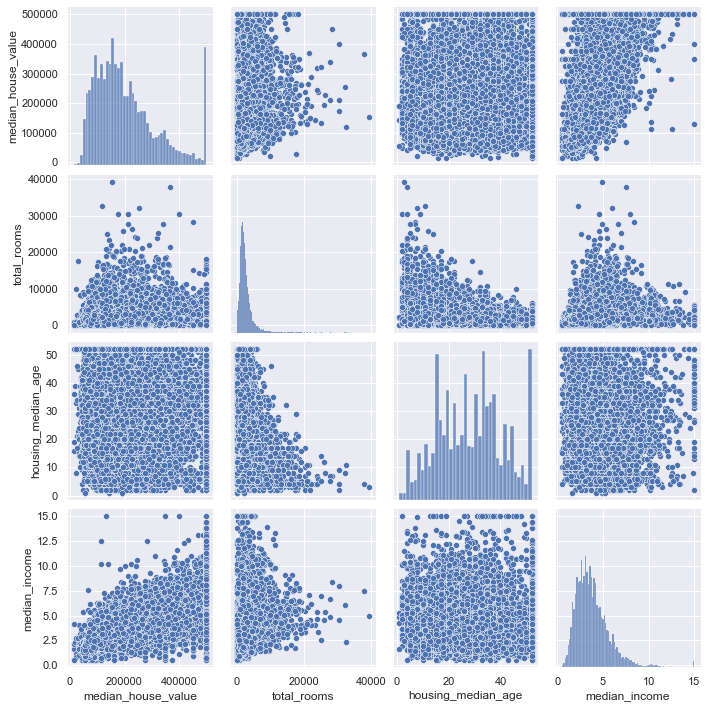

In [230]:
## Distribution of median house value median income total rooms housing median age.
sns.pairplot(cal_house[['median_house_value' , 'total_rooms' , 'housing_median_age' , 'median_income']])

##### Clearly see from the pair plot the promising relation between median_income and median_housing_value.

##### -------------------------------------------------------------------------------

In [231]:
## Creating the correlation matrix.
mat =  cal_house.corr()
mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [232]:
mat['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

##### Sorting the correlation with median_house_value in deceinding order

<AxesSubplot:>

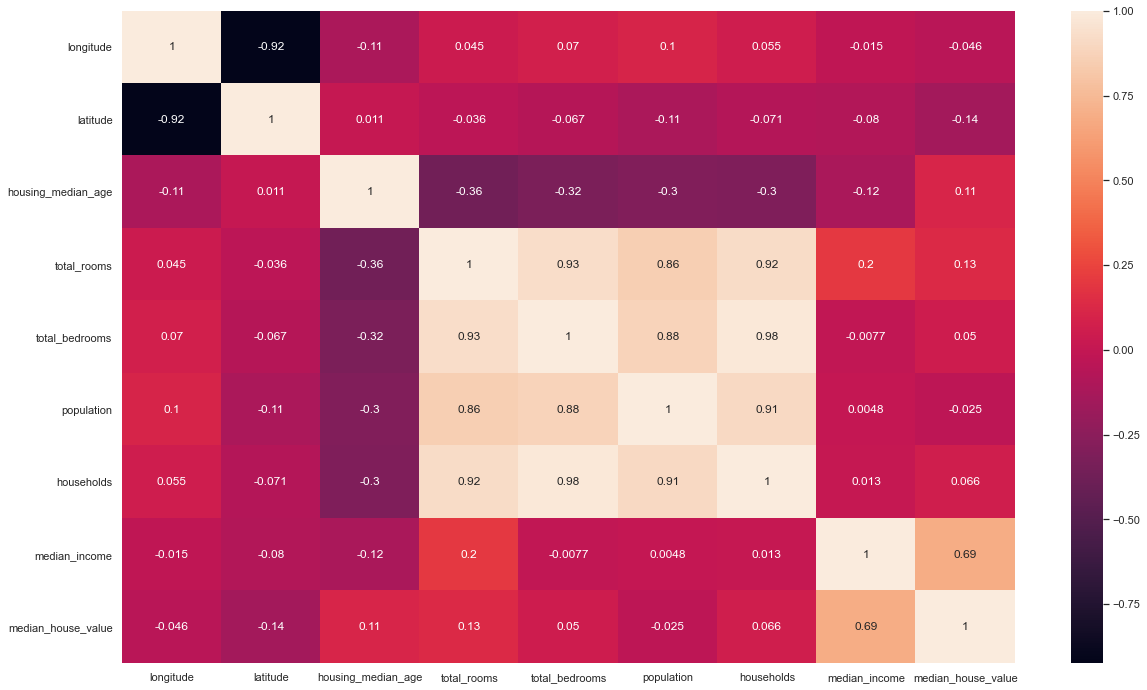

In [233]:
sns.heatmap(cal_house.corr(),annot = True)

In [234]:
### Median_income ,total_rooms , housing_median_age has more correlation  with median_house_value as compare
### to total_bedrooms and households

##### 

### Task 2 -  Getting  the null values  and handling the missing values if any in the data set.

In [235]:
cal_house.isnull().sum()  ## Getting the sum of null values of all columns . total_bedroom has 207 null values.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [236]:
cal_house.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

In [237]:
cal_house.isna().any().any()

True

In [238]:
cal_house.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

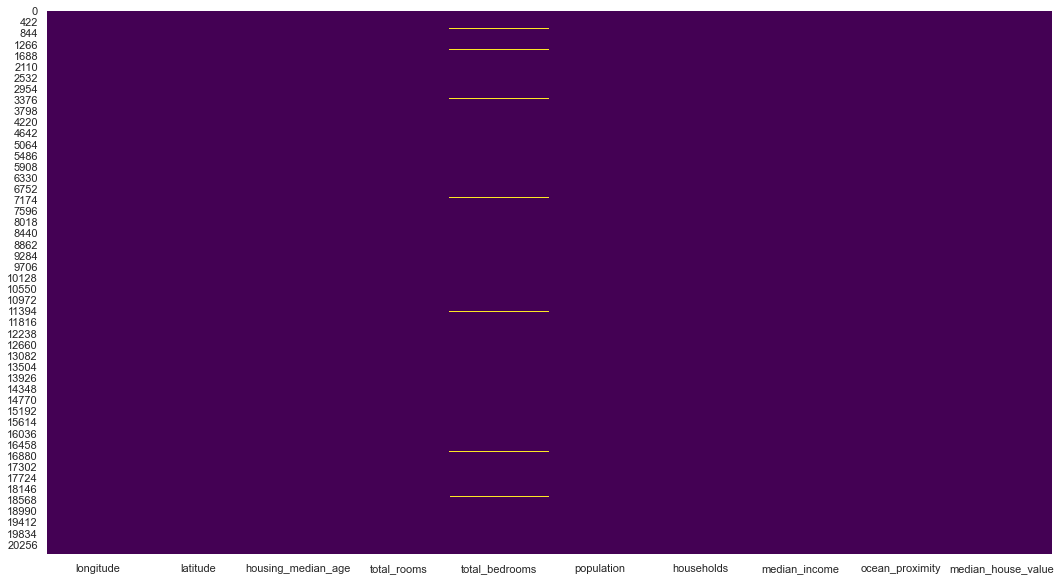

In [239]:
### Plotting the heat map to get visulisation of null values
sns.set({'figure.figsize':(18,10)})
sns.heatmap(cal_house.isnull() , cbar = False , cmap = 'viridis')


#### Since total_bedrooms has subsequent no of null values which can be clearly visulized in heatmap

In [240]:
## Getting the rows in total_bedrooms that contains null only.
cal_house.loc[cal_house.total_bedrooms.isna(),][['total_bedrooms']]  

,total_bedrooms
290,NaN
341,NaN
538,NaN
563,NaN
696,NaN
...,...
20267,NaN
20268,NaN
20372,NaN
20460,NaN


In [241]:
len(cal_house.loc[cal_house.total_bedrooms.isna(),][['total_bedrooms']])

207

#### We find in the california house prediction dataset total_bedrooms has 207 null values and other columns has zero null values.

In [242]:
### We can also check the missing values by sorting the columns that has max to min missing values.
total = cal_house.isnull().sum().sort_values(ascending = False)
total

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [243]:
### We can also check the missing values by sorting the columns that contains min to max missing values.
total1 = cal_house.isnull().sum().sort_values(ascending = True)
total1

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
total_bedrooms        207
dtype: int64

In [244]:
### Calculate the % of missing values in the total_bedroom in the california house price dataset.
ttl_bdrm_per = ((cal_house.total_bedrooms.isnull().sum()/len(cal_house.total_bedrooms))*100)
ttl_bdrm_per

1.002906976744186

#### We can see the total_bedrooms has 1.01% of missing values/.

In [245]:
### Getting the total percentage missing values in california housing dataset.
percent = (cal_house.isnull().sum()/cal_house.shape[0])*100
percent

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

##### Here we got the percent of total_bedrooms missing percent that contains in the whole dataset of california house pricing

In [246]:
### sorting the percentage values in decending order.
percent = percent.sort_values(ascending = False)
percent

total_bedrooms        1.002907
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [247]:
### Concatenate the two total and percent and getting the total values and percent.
missing_values = pd.concat([total , percent] , axis = 1 , keys = ['Total','Percent'])
missing_values

,Total,Percent
total_bedrooms,207,1.002907
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
ocean_proximity,0,0.000000
median_house_value,0,0.000000


In [248]:
missing_values1 = total.append(percent)
missing_values1

total_bedrooms        207.000000
longitude               0.000000
latitude                0.000000
housing_median_age      0.000000
total_rooms             0.000000
population              0.000000
households              0.000000
median_income           0.000000
ocean_proximity         0.000000
median_house_value      0.000000
total_bedrooms          1.002907
longitude               0.000000
latitude                0.000000
housing_median_age      0.000000
total_rooms             0.000000
population              0.000000
households              0.000000
median_income           0.000000
ocean_proximity         0.000000
median_house_value      0.000000
dtype: float64

In [249]:
##Adding the datatypes in the above missing values.
missing_values['Type'] = cal_house[missing_values.index].dtypes
missing_values

,Total,Percent,Type
total_bedrooms,207,1.002907,float64
longitude,0,0.000000,float64
latitude,0,0.000000,float64
housing_median_age,0,0.000000,int64
total_rooms,0,0.000000,int64
population,0,0.000000,int64
households,0,0.000000,int64
median_income,0,0.000000,float64
ocean_proximity,0,0.000000,object
median_house_value,0,0.000000,int64


##### We got the total , percent and datatypes of missing values in the dataset.

In [250]:
## Getting the mean value of total_bedrooms in dataset.
me = cal_house.total_bedrooms.mean()
me

537.8705525375618

In [251]:
cal_house.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [252]:
cal_house.total_bedrooms.value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2111.0     1
1852.0     1
1663.0     1
1652.0     1
2479.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [253]:
# Replacing the missing values by mean of total_bedrooms.
cal_house.total_bedrooms.replace(np.NaN , me , inplace = True)
cal_house.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700


In [254]:
cal_house.total_bedrooms.isnull().sum()

0

In [255]:
cal_house.total_bedrooms.isnull().any() 
# any() returns true if any of the element in the passed list is true else it returns False

False

##### Interpretation : After replacing the missing values we find there is no missing values in total_bedrooms in the dataset.

In [256]:
### Missing values can also be replace by another method.
### cal_house.total_bedrooms.fillna(cal_house.total_bedrooms.mean())

<AxesSubplot:>

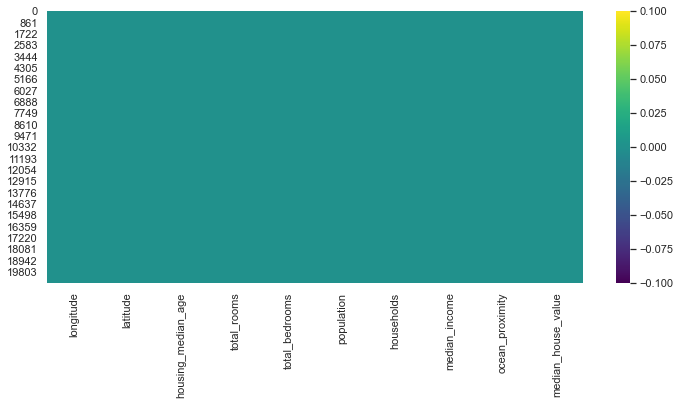

In [257]:
##Plottint the heat map again to visulize the missing values.
sns.set(rc = {'figure.figsize' : (12,5)})
sns.heatmap(cal_house.isna() , cbar = True , cmap = 'viridis')

#### By plotting again heat map for visulize the null values for the dataset we can find there is no null values in the dataset after imputing the missing values by mean of total_bedrooms in total_bedrooms columns.

###   

In [258]:
cal_house.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600


In [259]:
outliers_detect=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
outliers_detect

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

##### 

#### Checking for Outliers

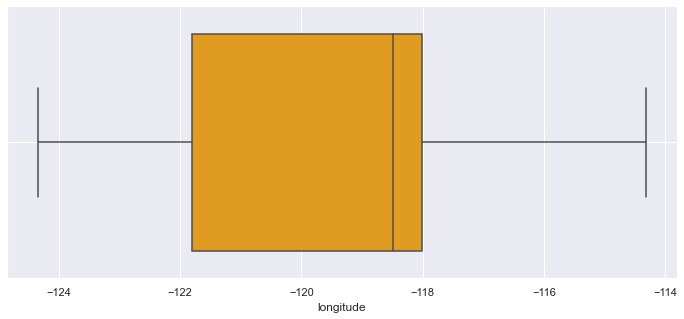

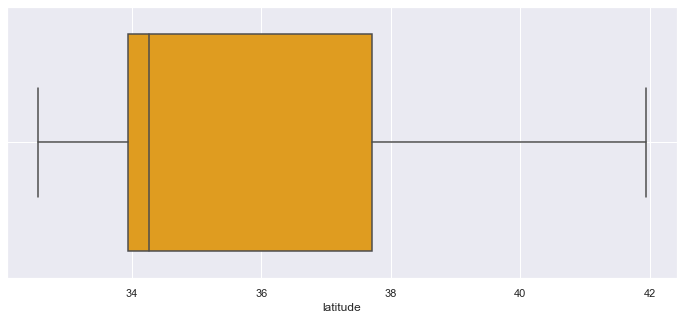

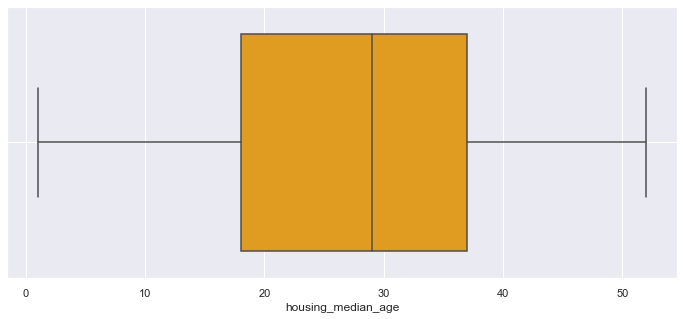

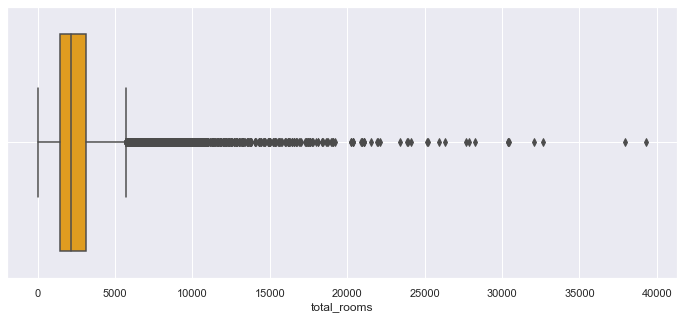

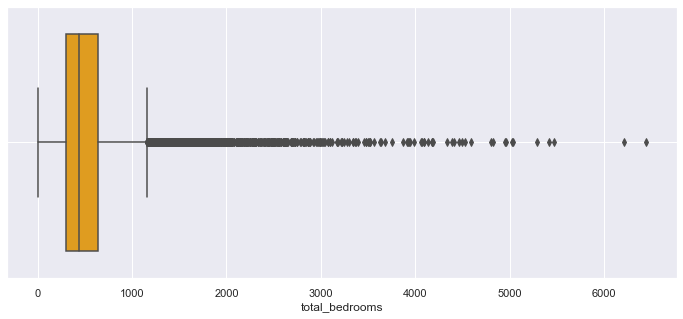

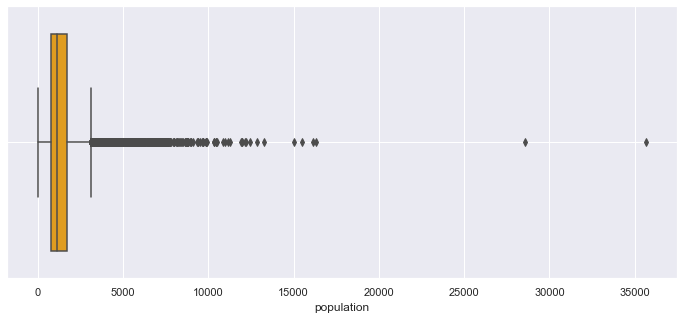

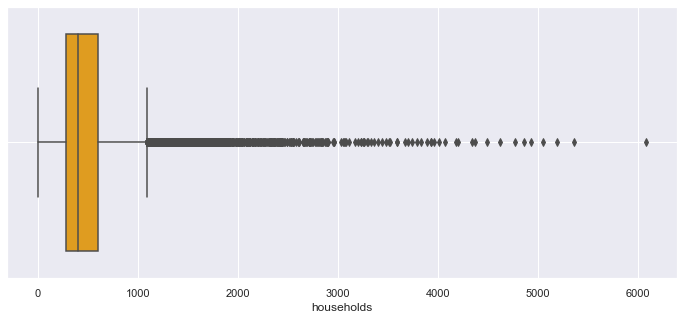

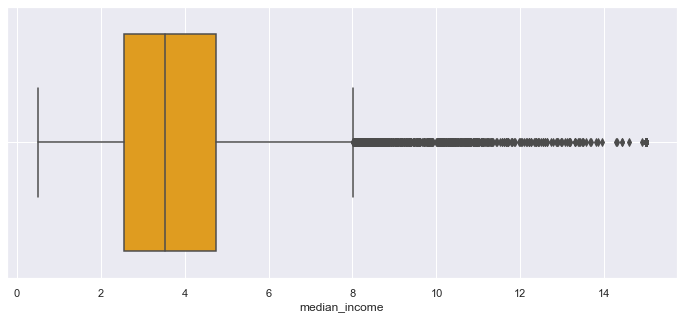

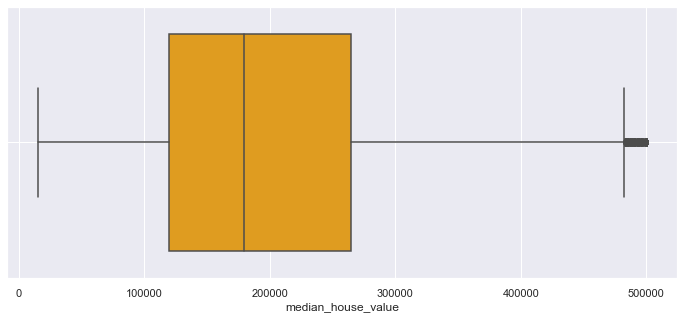

In [260]:
for i in outliers_detect:
    sns.boxplot(x = i  , data = cal_house , color = 'orange')
    plt.grid(True)
    plt.show()

#### -----------------------------------------------------------------------------------------------------------------

In [261]:
### Missing values can also be replaced by using sklearn and imputer
#from sklearn.preprocessing import Imputer
#imputer_mean = SImputer(missing_values='NaN',strategy='mean')
#cal_house['total_bedrooms']=imputer_mean.fit_transform(cal_house[['total_bedrooms']])

### Task -3 Converting the categorical variable into numeric 

In [262]:
cat_num = pd.get_dummies(cal_house.ocean_proximity , drop_first = True)

In [263]:
pd.DataFrame(cat_num)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20635,1,0,0,0
20636,1,0,0,0
20637,1,0,0,0
20638,1,0,0,0


In [264]:
cal_house.drop('ocean_proximity',axis=1,inplace = True)  ### Dropping the column ocean_proximity.
pd.concat([cal_house,cat_num],axis = 1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1,0,0,0


##### Since we convert the caterogical variable into numeric variable and convert the cat_to_num to dataframe after which we concatenate both the dataframe.

In [265]:
cal_house_new = pd.concat([cal_house , cat_num],axis = 1)
cal_house_new.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0


In [266]:
cal_house_new.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

##### We got the new columns of converted categorical variables into numeric

###### --------------------------------------------------

#### Task - 4 Splitting the data into train and test dataset.

In [267]:
X = cal_house_new[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 
                   'households', 'median_income','INLAND', 'ISLAND', 'NEAR BAY','NEAR OCEAN']]
y_ = cal_house_new[['median_house_value']]

In [268]:
# Importing the linear regression and model selection train test from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler  ## Std scaler is used for scaling of the data.

In [269]:
#Now splitting the the data into train and test by 20% and 80%.
## The random state that we provide is used as a seed to the random number generator for train and test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2, random_state = 0)

In [270]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12069,-117.55,33.83,6,502,76.0,228,65,4.2386,1,0,0,0
15925,-122.44,37.73,52,2381,492.0,1485,447,4.3898,0,0,1,0
11162,-118.00,33.83,26,1718,385.0,1022,368,3.9333,0,0,0,0
4904,-118.26,34.01,38,697,208.0,749,206,1.4653,0,0,0,0
4683,-118.36,34.08,52,2373,601.0,1135,576,3.1765,0,0,0,0


In [271]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 12)
(4128, 12)
(16512, 1)
(4128, 1)


##### We got the no of rows and columns splitted in train and test data correspondingly

##### --------------------------------------------------------------

### Task -5 Standardise the data for scaling - Standardise training and test dataset.


In [272]:
#      Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1

# 1)   The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting 
#      the differences in the range of the values.

# Ques. Why we use fit_transform for X_train and why we use only transform for test dataset.
#  Ans. By fit_transform the model built by us will learn the mean and variance of the features of the training set.
#       These learned parameters are then used to scale our test data.

#       Using the transform method in test dataset we can use the same mean and variance as it is calculated from our 
#       training data to transform our test data.Thats why we use only transform in our test dataset.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test  = sc.transform(y_test)

_#_ The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.


In [273]:
X_train

array([[ 1.00389865, -0.8400624 , -1.79507596, ..., -0.01348032,
        -0.35239609, -0.38649771],
       [-1.43477229,  0.98536392,  1.85553889, ..., -0.01348032,
         2.83771591, -0.38649771],
       [ 0.77948108, -0.8400624 , -0.20785212, ..., -0.01348032,
        -0.35239609, -0.38649771],
       ...,
       [-1.1654712 ,  0.44709718,  0.18895385, ..., -0.01348032,
        -0.35239609,  2.58733744],
       [ 0.81439048, -0.93835459,  0.42703742, ..., -0.01348032,
        -0.35239609, -0.38649771],
       [ 1.99632302, -1.32216217, -1.08082523, ..., -0.01348032,
        -0.35239609, -0.38649771]])

In [274]:
X_test

array([[ 1.2532515 , -1.42513494, -0.52529688, ..., -0.01348032,
        -0.35239609,  2.58733744],
       [ 0.79444225, -0.79793718,  0.26831504, ..., -0.01348032,
        -0.35239609, -0.38649771],
       [-1.13554886,  1.41597731,  0.03023146, ..., -0.01348032,
        -0.35239609, -0.38649771],
       ...,
       [-0.67673961,  1.51426949, -1.39827   , ..., -0.01348032,
        -0.35239609, -0.38649771],
       [-1.19040649,  1.09301727, -0.84274165, ..., -0.01348032,
        -0.35239609, -0.38649771],
       [ 0.67973993, -0.70432557,  1.85553889, ..., -0.01348032,
        -0.35239609, -0.38649771]])

In [275]:
y_train

array([[ 2.53052249],
       [ 0.54240803],
       [-0.09637901],
       ...,
       [ 0.70923604],
       [ 2.3973972 ],
       [-1.191566  ]])

In [276]:
y_test

array([[-0.60810016],
       [ 0.294327  ],
       [-0.0566169 ],
       ...,
       [-0.67984485],
       [ 0.45164668],
       [-0.34273126]])

##### We get the featured scaled data of train and test dataset.

##### ---------------------------------------------------------------------------

### Task - 6 Building the Model on Train Datset and Predict the same on Test dataset using Linear Regression.

In [277]:
# Task A) - Building the model using linear Regression on training dataset.
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [278]:
## Task B) Predicting the output of the model on the test datasetusing the fitted model
pred_y = LR.predict(X_test)
pred_y

array([[ 0.0806526 ],
       [ 0.69326297],
       [-0.24023506],
       ...,
       [-1.02094642],
       [ 0.41538113],
       [ 0.05217915]])

##### We got the predicted values of the output of model on the test dataset.

In [279]:
### To check how well the prediction of our model are or to check the accuracy of the model that how well the model is 
### fitted to the predicted values.
from sklearn.metrics import mean_squared_error , mean_absolute_error
accuracy = mean_squared_error(pred_y,y_test)
print('mean squared error (RMSE) from Linear Regression = ')
print(accuracy)
print('root mean squared error (RMSE) from Linear Regression = ')

print(np.sqrt(accuracy))

mean squared error (RMSE) from Linear Regression = 
0.35253343088149774
root mean squared error (RMSE) from Linear Regression = 
0.5937452575654796


#### We got the accuracy of model 59.37 percent 

##### RMSE is a good measure of accuracy

In [280]:
mean_absolute_error(pred_y,y_test)

0.42957840988527324

In [281]:
## Accuracy of my train data
LR.score(X_train,y_train)

0.6471730344800684

In [282]:
### Accuracy of test data
LR.score(X_test,y_test)

0.6381617983930401

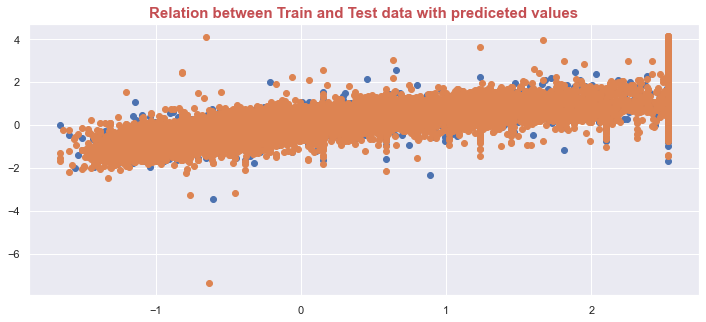

In [283]:
### Plotting the scatter plot for test and train data.
plt.scatter(y_test , pred_y)
plt.scatter(y_train , LR.predict(X_train))
plt.title('Relation between Train and Test data with prediceted values',color = 'r' , weight = 'bold', size = 15)
plt.grid(True)

In [284]:
# Getting the rmse value manually.
np.sqrt(np.mean(np.square(y_test-pred_y)))

0.5937452575654796

In [285]:
# Getting the mse value manually.
np.mean(np.square(y_test-pred_y))

0.35253343088149774

##### 

##### ------------------------------------------------------

### Bonus Exercies

In [286]:
## Task -1 median_income column from the independent variables (from X_train and X_test)
cal_house_new.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0


In [287]:
cal_house_new.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
INLAND                False
ISLAND                False
NEAR BAY              False
NEAR OCEAN            False
dtype: bool

In [288]:
X = cal_house_new.iloc[:,[7]].values
y = cal_house_new.iloc[:,[8]].values 
## Values are use to return the view object as list in array form.

In [289]:
X

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [290]:
y

array([[452600],
       [358500],
       [352100],
       ...,
       [ 92300],
       [ 84700],
       [ 89400]], dtype=int64)

In [291]:
X = cal_house_new[['median_income']]
X.head(3) 

,median_income
0,8.3252
1,8.3014
2,7.2574


In [292]:
y = cal_house_new[['median_house_value']]
y.head(3)

,median_house_value
0,452600
1,358500
2,352100


In [293]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [294]:
X_train.shape

(16512, 1)

In [295]:
X_train.head(3)

,median_income
12069,4.2386
15925,4.3898
11162,3.9333


In [296]:
X_test.shape

(4128, 1)

In [297]:
y_train.shape

(16512, 1)

In [298]:
y_test.shape

(4128, 1)

##### WE got the shape of our train and test data of one exploratory variable and one dependent variable.

In [299]:
### Scaling the train and test data to get all the feature of the dataset on same scale using the mean and variance of train data
##and fitting the same in test data with same mean and variance.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [300]:
# Now building the model on train data and predict the model output on test data.
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
model_bonus = LinearReg.fit(X_train , y_train)
model_bonus

LinearRegression()

In [301]:
## Predicting the output of the model on test data
y_pred = model_bonus.predict(X_test)
y_pred

array([[ 0.10009624],
       [ 0.69151432],
       [ 0.17163465],
       ...,
       [-0.24473414],
       [ 0.82376409],
       [-0.19753841]])

##### We got the predicted values as output.

In [302]:
#Accracy of training data.
model_bonus.score(X_train,y_train)

0.47991412719941506

In [303]:
model_bonus.score(X_test,y_test)

0.4466846804895944

In [304]:
## Getting the RMSE value.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.539086661054595

In [305]:
# Accuracy of the model by RMSE.
np.sqrt(mean_squared_error(y_test,y_pred))

0.7342252113994691

#### We got the accuracy of mode 73.42 percent by using only sigle independent variable.

##### 

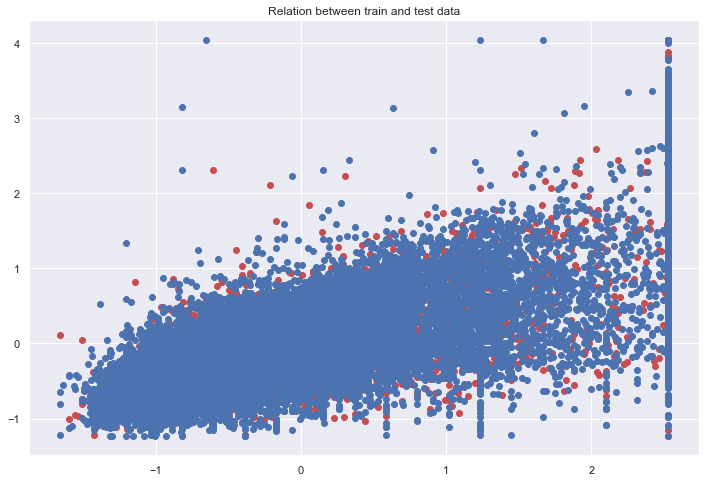

In [306]:
# plot between train and test data(actual vs predicted)
plt.figure(figsize = (12,8))
plt.scatter(y_test , y_pred, color = 'r')
plt.scatter(y_train , model_bonus.predict(X_train))
plt.title('Relation between train and test data')
plt.grid(True)
plt.show()

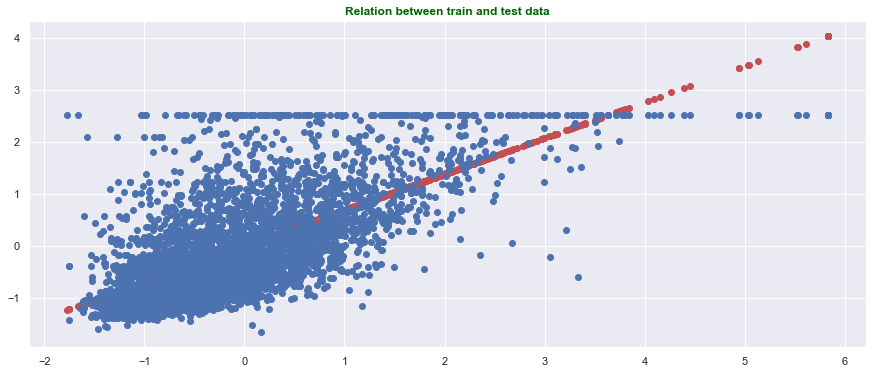

In [307]:
# Scatter plot between  actual test data and predicted data
get_ipython().run_line_magic('matplotlib', 'inline')
plt.figure(figsize = (15,6))
plt.scatter(X_test, y_pred , color = 'r')
plt.scatter(X_test,y_test , color = 'b')
plt.title('Relation between train and test data', weight = 'bold' , size = 12 , color = 'darkgreen')
plt.grid(True)
plt.show()

##### Here we got the predicted line around 45 degree.

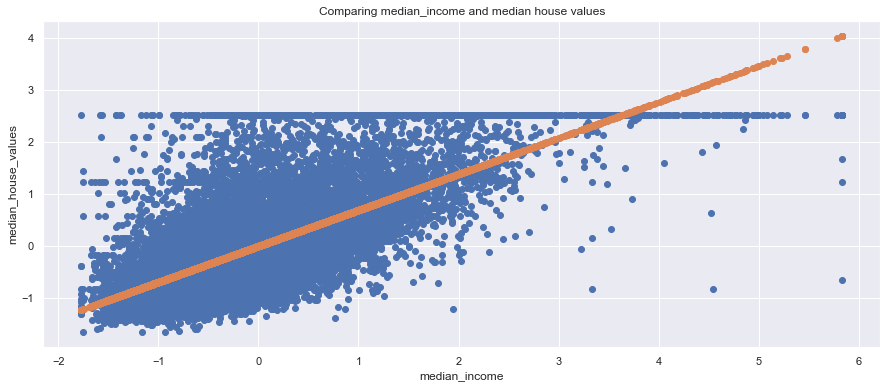

In [308]:
### Plotting the training set \.
plt.figure(figsize = (15,6))
plt.scatter(X_train , y_train)
plt.scatter(X_train , model_bonus.predict(X_train))
plt.title('Comparing median_income and median house values')
plt.xlabel('median_income')
plt.ylabel('median_house_values')
plt.grid(True)
plt.show()